# Mental Health & Productivity EDA Project
#### This project performs a comprehensive **Exploratory Data Analysis (EDA)** on a dataset related to students' **mental health, lifestyle habits, and productivity levels**. The goal is to uncover trends, correlations, and insights that can inform wellness strategies and personal development.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [5]:
df=pd.read_excel(r"C:\Users\lavis\OneDrive\Desktop\EDA Project\mental_health_productivity_.xlsx")
df.head()

,Age,Gender,Sleep Hours,Screen Time (hrs/day),Study Hours (hrs/day),Physical Activity (mins/day),Diet Quality,Social Media Usage,Stress Level (1-10),Productivity Level (1-10)
0,22,Prefer not to say,5.4,4.5,5.7,37,Average,Medium,2,8
1,19,Female,6.1,6.8,2.3,77,Good,Medium,8,9
2,18,Male,5.4,4.4,3.0,13,Average,Medium,4,3
3,21,Male,4.7,6.1,2.7,33,Average,High,4,5
4,18,Female,5.6,6.7,3.6,19,Average,High,4,2


In [10]:
# shape of the dataset
df.shape

(1000, 10)

In [11]:
# data types of each column
df.dtypes

Age                               int64
Gender                           object
Sleep Hours                     float64
Screen Time (hrs/day)           float64
Study Hours (hrs/day)           float64
Physical Activity (mins/day)      int64
Diet Quality                     object
Social Media Usage               object
Stress Level (1-10)               int64
Productivity Level (1-10)         int64
dtype: object

In [13]:
# missing value
df.isnull().sum()

Age                             0
Gender                          0
Sleep Hours                     0
Screen Time (hrs/day)           0
Study Hours (hrs/day)           0
Physical Activity (mins/day)    0
Diet Quality                    0
Social Media Usage              0
Stress Level (1-10)             0
Productivity Level (1-10)       0
dtype: int64

In [14]:
# summery statstics for numeric column
df.describe()

,Age,Sleep Hours,Screen Time (hrs/day),Study Hours (hrs/day),Physical Activity (mins/day),Stress Level (1-10),Productivity Level (1-10)
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.377000,6.745100,5.04650,3.472900,43.362000,5.485000,5.413000
std,2.267159,1.283208,1.72831,1.444577,25.675127,2.907271,2.849658
min,18.000000,4.500000,2.00000,1.000000,0.000000,1.000000,1.000000
25%,19.000000,5.700000,3.70000,2.300000,20.000000,3.000000,3.000000
50%,21.000000,6.800000,5.05000,3.500000,43.500000,5.000000,5.000000
75%,23.000000,7.800000,6.60000,4.700000,65.000000,8.000000,8.000000
max,25.000000,9.000000,8.00000,6.000000,90.000000,10.000000,10.000000


## Data Cleaning

In [15]:
# Handle Missing Value
df.isnull().sum()

Age                             0
Gender                          0
Sleep Hours                     0
Screen Time (hrs/day)           0
Study Hours (hrs/day)           0
Physical Activity (mins/day)    0
Diet Quality                    0
Social Media Usage              0
Stress Level (1-10)             0
Productivity Level (1-10)       0
dtype: int64

In [ ]:
# Standardize 'Gender'
df['Gender'] = df['Gender'].str.strip().str.lower()
df['Gender'] = df['Gender'].replace({
    'male': 'Male',
    'female': 'Female',
    'prefer not to say': 'Prefer not to say',
    'non-binary': 'Non-binary'
})

 # Standardize 'Diet Quality'
df['Diet Quality'] = df['Diet Quality'].str.strip().str.capitalize()

 # Standardize 'Social Media Usage'
df['Social Media Usage'] = df['Social Media Usage'].str.strip().str.capitalize()

 #  verify unique values 
print("Cleaned Gender values:", df['Gender'].unique())
print("Cleaned Diet Quality values:", df['Diet Quality'].unique())
print("Cleaned Social Media Usage values:", df['Social Media Usage'].unique())


Cleaned Gender values: ['Prefer not to say' 'Female' 'Male' 'other']
Cleaned Diet Quality values: ['Average' 'Good' 'Poor']
Cleaned Social Media Usage values: ['Medium' 'High' 'Low']


## Univariate Analysis (Histrogram + Kde plots)

Key Observation
 
 Age: Slightly skewed towards early 20s (most are 20–22)

 Sleep Hours: Normal-like distribution with most between 6–8 hours.
 
 Screen Time: Slight right skew — most students use screens for 4–6 hours/day.

Study Hours: Peaks around 2–4 hours/day — seems consistent with student behavior.
 
 Physical Activity: Skewed left — many students have low activity (0–40 mins/day).

Stress Level: Fairly even, but a notable number experience high stress (7–10).

Productivity Level: Similar to stress — ranges widely but many score moderate to high.

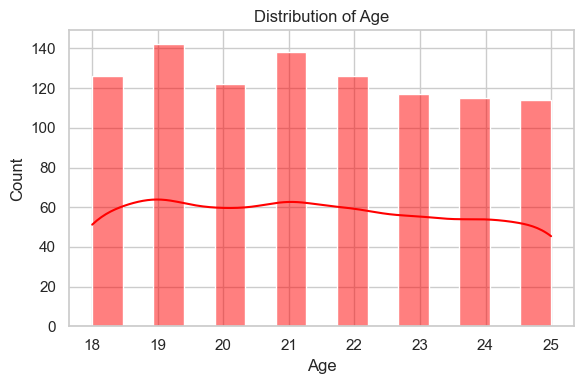

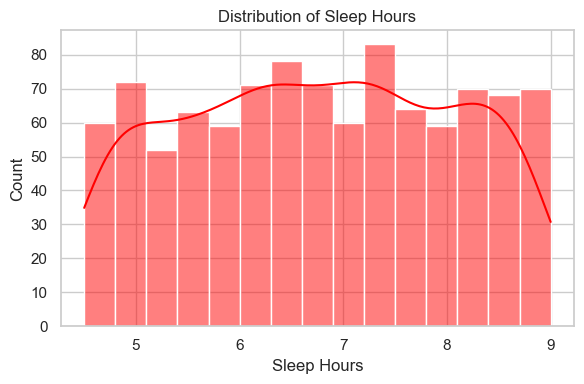

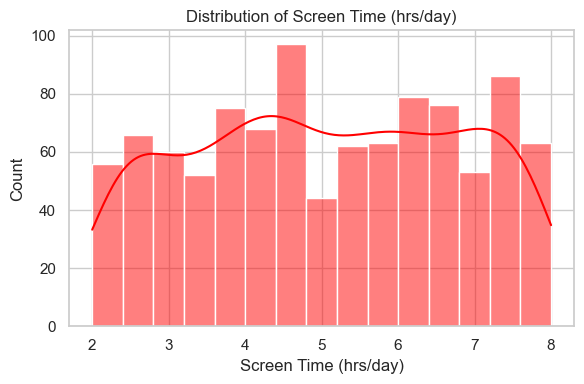

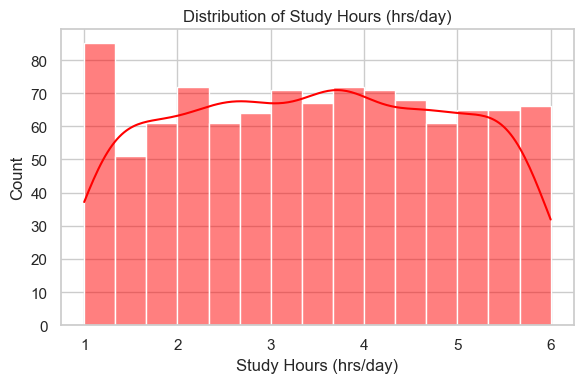

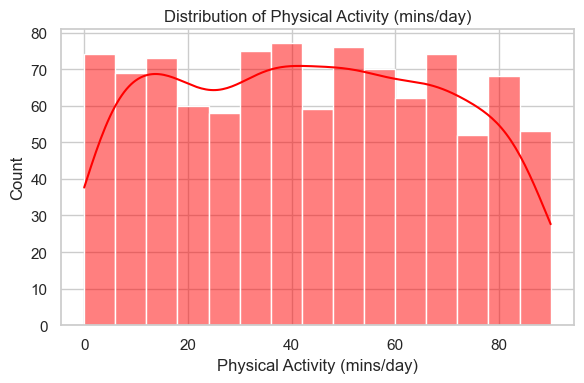

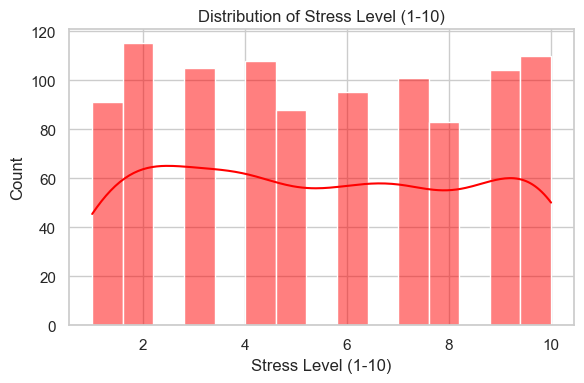

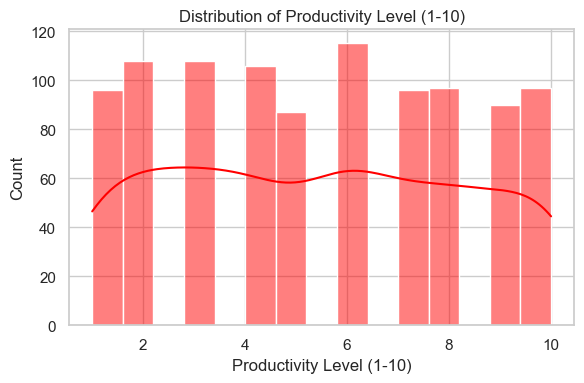

In [ ]:
# List of numerical columns
numerical_columns = ['Age', 'Sleep Hours', 'Screen Time (hrs/day)', 
                     'Study Hours (hrs/day)', 'Physical Activity (mins/day)', 
                     'Stress Level (1-10)', 'Productivity Level (1-10)']

# Loop through each column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='red', bins=15)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    


## Bivariate Analysis

Key Relationships:

Sleep Hours vs Productivity
📈 Slight positive trend — more sleep may improve productivity, but it's not a strong correlation.

Screen Time vs Stress Level
📈 Positive trend — students with higher screen time tend to report higher stress.

Study Hours vs Productivity
📈 Clearer positive correlation — more study hours generally align with better productivity.

Physical Activity vs Stress Level
📉 Slight negative trend — those who exercise more may have lower stress levels.



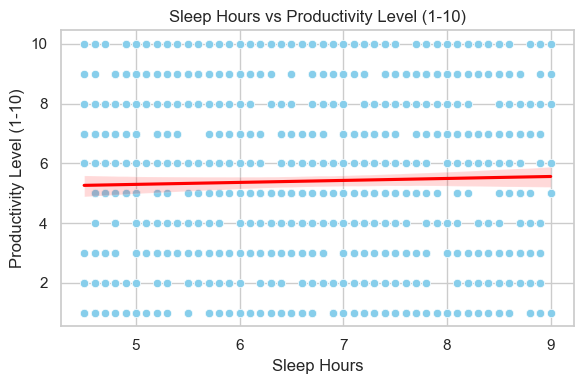

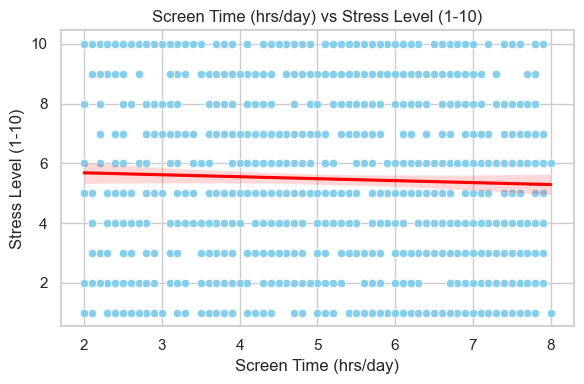

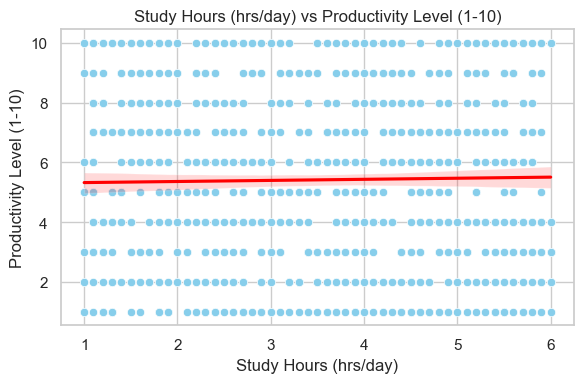

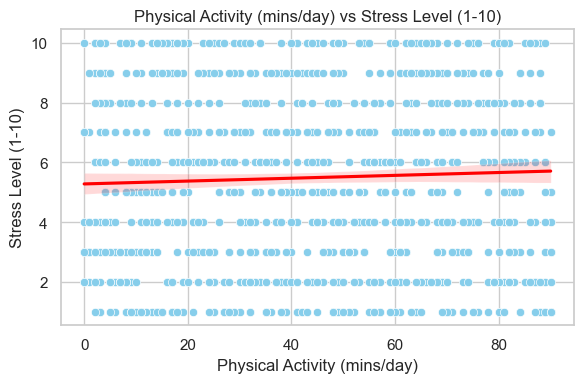

In [27]:
# Define pairs of features for bivariate analysis
bivariate_pairs = [
    ('Sleep Hours', 'Productivity Level (1-10)'),
    ('Screen Time (hrs/day)', 'Stress Level (1-10)'),
    ('Study Hours (hrs/day)', 'Productivity Level (1-10)'),
    ('Physical Activity (mins/day)', 'Stress Level (1-10)')
]

# Loop through each pair
for x_col, y_col in bivariate_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x_col, y=y_col, color='skyblue')
    sns.regplot(data=df, x=x_col, y=y_col, scatter=False, color='red')
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()
    
     


## Categorical Variable Analysis

In [29]:
df.columns

Index(['Age', 'Gender', 'Sleep Hours', 'Screen Time (hrs/day)',
       'Study Hours (hrs/day)', 'Physical Activity (mins/day)', 'Diet Quality',
       'Social Media Usage', 'Stress Level (1-10)',
       'Productivity Level (1-10)'],
      dtype='object')

C:\Users\lavis\AppData\Local\Temp\ipykernel_268\708556004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=cat_col, y=target, palette='Set2')


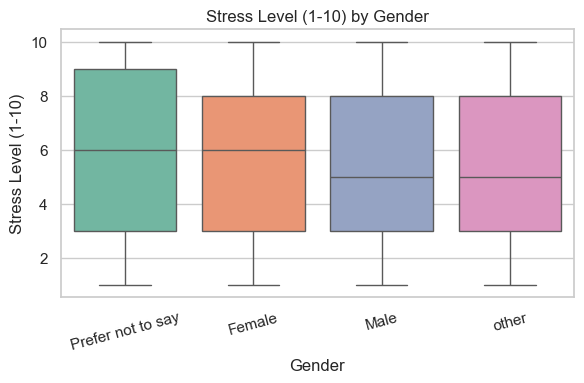

C:\Users\lavis\AppData\Local\Temp\ipykernel_268\708556004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=cat_col, y=target, palette='Set2')


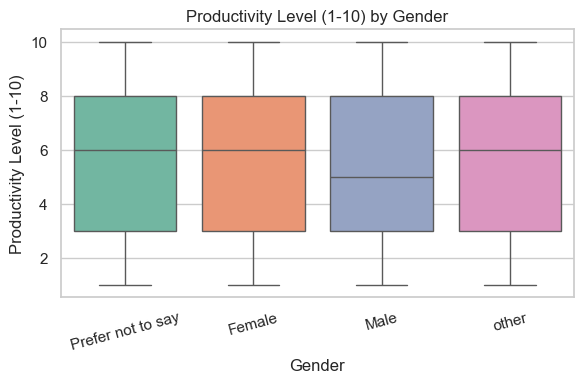

C:\Users\lavis\AppData\Local\Temp\ipykernel_268\708556004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=cat_col, y=target, palette='Set2')


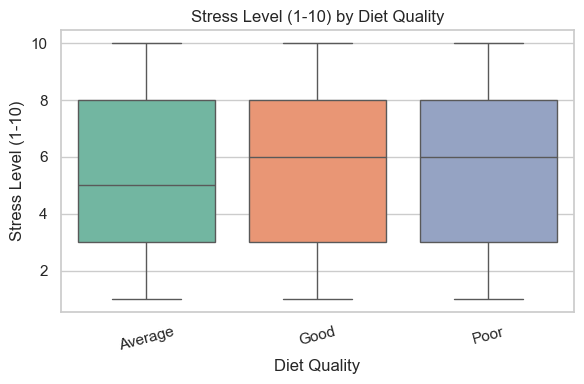

C:\Users\lavis\AppData\Local\Temp\ipykernel_268\708556004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=cat_col, y=target, palette='Set2')


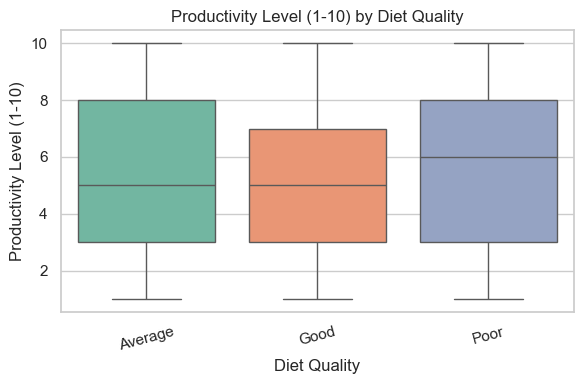

C:\Users\lavis\AppData\Local\Temp\ipykernel_268\708556004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=cat_col, y=target, palette='Set2')


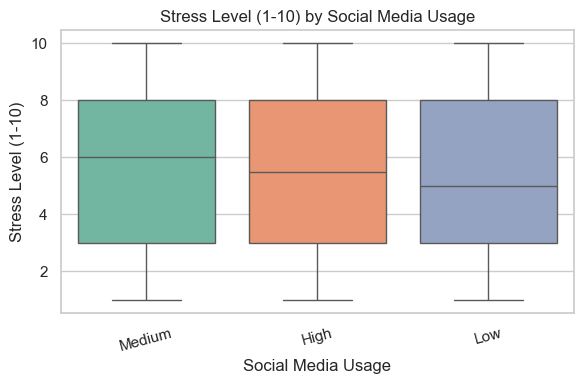

C:\Users\lavis\AppData\Local\Temp\ipykernel_268\708556004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=cat_col, y=target, palette='Set2')


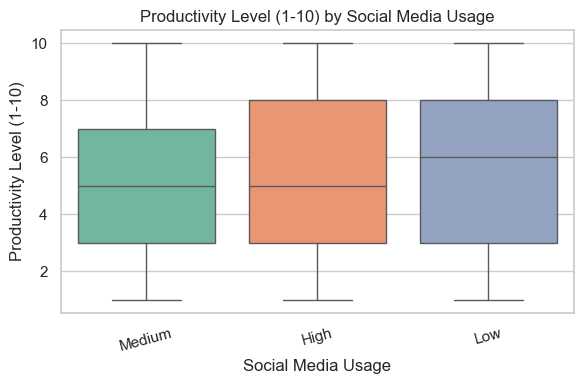

In [37]:
# List of categorical columns you want to analyze
categorical_columns = ['Gender','Diet Quality', 'Social Media Usage']

# Numerical targets you want to compare across categories
target_columns = ['Stress Level (1-10)', 'Productivity Level (1-10)']

# Plot boxplots: target variable distribution across each category
for cat_col in categorical_columns:
    for target in target_columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df,x=cat_col, y=target, palette='Set2')
        plt.title(f'{target} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(target)
        plt.xticks(rotation=15)
        plt.tight_layout()
        plt.show()


## Conclusion
#### Lifestyle factors significantly influence students’ mental health and productivity. This analysis highlights the importance of balanced routines, healthy eating, and limiting screen time to maintain well-being and performance.

